# Install dependencies here

Install the fitting tensorflow-gpu version. Clone and install tf-wavelets. The wavelet database is used as initializer for the prefiltering network. Restart kernel to complete installation

In [ ]:
!git clone https://github.com/UiO-CS/tf-wavelets
!(cd tf-wavelets && python setup.py install)
!pip install tensorflow_addons
import os
os.kill(os.getpid(), 9)

Cloning into 'tf-wavelets'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 321 (delta 9), reused 21 (delta 9), pack-reused 300
Receiving objects: 100% (321/321), 5.71 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (157/157), done.
running install
running bdist_egg
running egg_info
creating tfwavelets.egg-info
writing tfwavelets.egg-info/PKG-INFO
writing dependency_links to tfwavelets.egg-info/dependency_links.txt
writing requirements to tfwavelets.egg-info/requires.txt
writing top-level names to tfwavelets.egg-info/top_level.txt
writing manifest file 'tfwavelets.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'tfwavelets.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/tfwavelets
copying tfwavelets/__init__.py -> build/lib/tfwavelets
copyin

# Pull and update AI here

Get `ReCSAI` from Github

In [ ]:
!git clone https://github.com/super-resolution/ReCSAI

Cloning into 'CSrecon'...
remote: Enumerating objects: 2320, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 2320 (delta 4), reused 7 (delta 3), pack-reused 2307
Receiving objects: 100% (2320/2320), 460.72 MiB | 16.65 MiB/s, done.
Resolving deltas: 100% (1507/1507), done.
Checking out files: 100% (1605/1605), done.


Change the working directory to the cloned folder and pull update

In [ ]:
%cd ReCSAI

/content/CSrecon
From https://github.com/super-resolution/CSrecon
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [ ]:
import tensorflow as tf
from src.data import DataGeneration, GPUDataGeneration
from src.visualization import plot_data_gen
import os 
print(os.getcwd())


/content/CSrecon



Possible kwargs for `DataGeneration`:
*   `sigma_x`: Standard deviation of the PSF in x direction
*   `sigma_y`: Standard deviation of the PSF in y direction
*   `quantum_efficiency`: Quatum efficiency of the detector
*   `dark_noise`: Dark noise of the detector
*   `sensitivity`: Sensitivity of the detector
*   `bitdepth`: Bitdepth of the discretization
Build a data generator and show some sample frames 


0


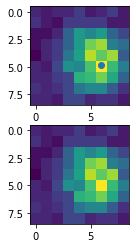

0


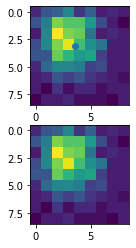

0


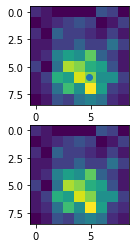

0


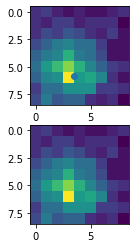

In [ ]:

gener = GPUDataGeneration(9)
generator, shape = gener.create_data_generator(2, noiseless_ground_truth=True)
dataset = tf.data.Dataset.from_generator(generator, (tf.float32, tf.float32, tf.float32, tf.float32),
                                          output_shapes=shape)
plot_data_gen(dataset)


# Create a larger dataset for Training

In [ ]:
gener.create_dataset(r"example_path", dataset_size=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


# Start your training

In [ ]:
from src.trainings.train_cs_net import ResUNetFacade

training = ResUNetFacade()
training.dataset_path = r"/example_path"
training.train_saved_data()

(None, 16, 8, 1) (None, 16, 8, 1)
(None, 16, 8, 1) (None, 16, 8, 1)
(None, 32, 16, 1) (None, 32, 16, 1)
(None, 32, 16, 1) (None, 32, 16, 1)
(None, 64, 32, 1) (None, 64, 32, 1)
(None, 64, 32, 1) (None, 64, 32, 1)
(None, 128, 64, 1) (None, 128, 64, 1)
(None, 128, 64, 1) (None, 128, 64, 1)
initializing metrics from scratch
Initializing from scratch.
tf.Tensor(0, shape=(), dtype=int32)
no truth data found
no truth data found
validation loss = 33148.58984375
[-0.0343316   0.03432227]
68.10652976059109
jaccard index 0.02 rmse 21.77 fp 7312.00 fn 808.00
tf.Tensor(0, shape=(), dtype=int32)
no truth data found
no truth data found
validation loss = 13053.880859375
nan
jaccard index 0.00 rmse 9000.00 fp 0.00 fn 0.00
tf.Tensor(0, shape=(), dtype=int32)
no truth data found


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Saved checkpoint for step 10: /content/CSrecon/trainings/cs_u/_final2_training_100_gpu_data/ckpt-1
loss 6201.18
no truth data found
validation loss = 5536.06201171875
[-0.05971839  0.11987293]
68.09592548331713
jaccard index 0.04 rmse 23.60 fp 6670.00 fn 667.00
tf.Tensor(0, shape=(), dtype=int32)
no truth data found
no truth data found
validation loss = 7993.498046875
[-0.13638903  0.13723896]
67.87756165248017
jaccard index 0.05 rmse 23.09 fp 6626.00 fn 623.00
tf.Tensor(0, shape=(), dtype=int32)
no truth data found
no truth data found
validation loss = 5083.423828125
[-0.19518676  0.3587767 ]
64.6418869318871
jaccard index 0.05 rmse 24.22 fp 6578.00 fn 576.00
tf.Tensor(0, shape=(), dtype=int32)
no truth data found
no truth data found
validation loss = 5733.1875
[-0.06839599  0.3574814 ]
62.53581740900028
jaccard index 0.07 rmse 24.75 fp 7435.00 fn 433.00
tf.Tensor(0, shape=(), dtype=int32)
no truth data found
Saved checkpoint for step 20: /content/CSrecon/trainings/cs_u/_final2_traini

KeyboardInterrupt: ignored